In [19]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import yfinance as yf
apple = yf.Ticker('AAPL')

apple.actions

hist=apple.history(period="1y")
hist=hist.reset_index()
hist.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-11-26 00:00:00-05:00,158.649250,159.524162,155.457766,155.905167,76959800,0.0,0
1,2021-11-29 00:00:00-05:00,158.450379,160.259884,157.873723,159.315369,88748200,0.0,0
2,2021-11-30 00:00:00-05:00,159.066819,164.564908,158.997215,164.346176,174048100,0.0,0
3,2021-12-01 00:00:00-05:00,166.513599,169.317334,163.580624,163.819244,152052500,0.0,0
4,2021-12-02 00:00:00-05:00,157.824041,163.252527,156.889462,162.815063,136739200,0.0,0


In [21]:
hist[["Close","Volume","Date"]]

,Close,Volume,Date
0,155.905167,76959800,2021-11-26 00:00:00-05:00
1,159.315369,88748200,2021-11-29 00:00:00-05:00
2,164.346176,174048100,2021-11-30 00:00:00-05:00
3,163.819244,152052500,2021-12-01 00:00:00-05:00
4,162.815063,136739200,2021-12-02 00:00:00-05:00
...,...,...,...
247,151.289993,74794600,2022-11-18 00:00:00-05:00
248,148.009995,58724100,2022-11-21 00:00:00-05:00
249,150.179993,51804100,2022-11-22 00:00:00-05:00
250,151.070007,58301400,2022-11-23 00:00:00-05:00


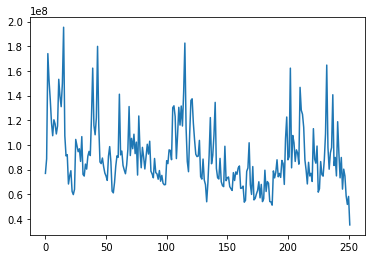

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist[["Volume"]].iloc[:, 0])

In [23]:
amt = hist[["Volume"]].iloc[:, 0]
amt.describe().astype('int')


count          252
mean      90911493
std       26207164
min       35195900
25%       73407350
50%       86381250
75%      102487475
max      195432700
Name: Volume, dtype: int64

In [24]:
import pandas as pd
import numpy as np

k = []
df = []
k_max = []

V0=hist["Volume"].mean()*(len(hist)/4)
print(V0) #V0的預設值
data = hist[["Close","Volume","Date"]]
v=0
a=0
b=0
c=0

for i in range(0, data.shape[0]):
  v=0
  for j in range(i,0-1,-1):
    if(v < V0):
      a=a+1
      v=v+data.iloc[j, 1]
      df.append([data.iloc[i, 0]-data.iloc[j, 0],i,j,v])
      k.append(data.iloc[i, 0]-data.iloc[j, 0])
    else:
      break;
  df1=np.asarray(df)
  if (df1.shape[0]==0):
    c = np.max(df1[b:a])
  else:  
    c = np.max(df1[b:a,0])
  k_max.append(c)
  b=a
  
df = np.asarray(df)
m = np.argmax(k)
print(pd.DataFrame(df)) #每一筆交易的價差與累計交易量
print(max(k))  #最大價差
print(df[m,1:].astype(int)) #最大價差的交易時期與累計交易量

5727424100.0
               0      1      2             3
0       0.000000    0.0    0.0  7.695980e+07
1       0.000000    1.0    1.0  8.874820e+07
2       3.410202    1.0    0.0  1.657080e+08
3       0.000000    2.0    2.0  1.740481e+08
4       5.030807    2.0    1.0  2.627963e+08
...          ...    ...    ...           ...
14317  -9.588409  251.0  192.0  5.413110e+09
14318  -8.849625  251.0  191.0  5.501102e+09
14319 -10.536835  251.0  190.0  5.579008e+09
14320 -13.002747  251.0  189.0  5.652322e+09
14321 -15.239014  251.0  188.0  5.731283e+09

[14322 rows x 4 columns]
44.596435546875
[       181        139 3139425400]


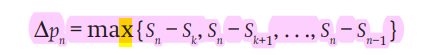

In [25]:
k_max = np.asarray(k_max) 
print(pd.DataFrame(k_max))  #delta_Pn = 0～251的所有最大價差

             0
0     0.000000
1     3.410202
2     8.441010
3     7.914078
4     6.909897
..         ...
247  16.419998
248  13.139999
249  15.309998
250  16.200012
251  13.240005

[252 rows x 1 columns]


In [26]:
a = df[m,1].astype(int)
b = df[m,2].astype(int)
print(data.iloc[a,2]) #最大價差出售日期
print(data.iloc[b,2]) #最大價差購買日期

2022-08-17 00:00:00-04:00
2022-06-16 00:00:00-04:00


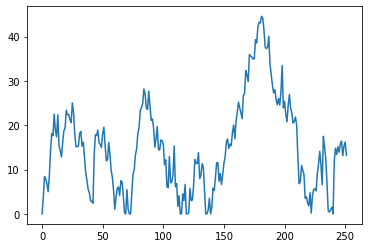

In [27]:
plt.plot(k_max) #delta_Pn的趨勢圖

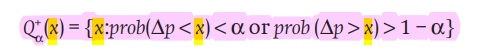

In [28]:
def Y(Data):
  df_dp = pd.DataFrame(Data)
  df_dp = df_dp.iloc[:,0]
  m = float(df_dp.mean())
  se = float(df_dp.std() / len(hist)**0.5)

  return (m-1.96*se)

Y(Data = df[:,3].round(2))  #Qa(x)

2591085570.1456304